<a href="https://colab.research.google.com/github/ShamsAl/MNIST/blob/main/CSE_4238_170104005_Assignmnet2_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# DataSet

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=358d9425016bb74c7f869613afda077f260f3099c1b3de502a4a6ee3c74fecd2
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
!gdown --id 10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW

Downloading...
From: https://drive.google.com/uc?id=10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW
To: /content/Dataset C.zip
162MB [00:02, 77.4MB/s]


In [ ]:
!unzip '/content/Dataset C.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

Read CSV

In [ ]:
traning_csv = '/content/training-c.csv'
read_df = pd.read_csv(traning_csv)

In [ ]:
read_df.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

Dataset Proceed

In [ ]:
number_of_digit_class = read_df['digit'].nunique()

DATASET_ROOT_DIR = './PROCESSED_DATASET_170104005/' 
path = Path(DATASET_ROOT_DIR)
path.mkdir(parents=True, exist_ok=True)
DATASET_ROOT_DIR = os.path.abspath(path)

for i in range(0,number_of_digit_class):
  select_digit = read_df[read_df['digit'] == i]
  for index,val in select_digit.iterrows():
    file_relative_path_from= f"./{val['database name']}/{val['filename']}"
    file_relative_dir_to = f"{DATASET_ROOT_DIR}/{val['digit']}"
    Path(file_relative_dir_to).mkdir(parents=True, exist_ok=True)
    shutil.copy(file_relative_path_from, file_relative_dir_to)
    print(file_relative_path_from , file_relative_dir_to , "OK")

Streaming output truncated to the last 5000 lines.
./training-c/c22339.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22368.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22403.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22404.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22415.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22423.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22435.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22456.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22462.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22477.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22488.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22497.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22513.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22517.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22524.png /

Creating zip file

In [ ]:
ZIP_FILE_NAME = 'PROCESSED_DATASET_170104005.zip'
!zip -r $ZIP_FILE_NAME 'PROCESSED_DATASET_170104005/'

Streaming output truncated to the last 5000 lines.
  adding: PROCESSED_DATASET_170104005/8/c18811.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c00578.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c10108.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c04968.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c16394.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c21911.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c22443.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c07231.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c06236.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c20679.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c10350.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c10777.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c15443.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c03231.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/8/c14653.png (stored 0%)
  ad

Copy zip file into Drive

In [ ]:
!cp '/content/PROCESSED_DATASET_170104005.zip'  '/content/drive/MyDrive/Softlab/dataset'


In [ ]:
!unzip -u '/content/PROCESSED_DATASET_170104005.zip' -d '/content/drive/MyDrive/Softlab/dataset'

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c18811.png  
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c00578.png  
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c10108.png  
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c04968.png  
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c16394.png  
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c21911.png  
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c22443.png  
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c07231.png  
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c06236.png  
 extracting: /content/drive/MyDrive/Softlab/dataset/PROCESSED_DATASET_170104005/8/c20679.png  

Load Proe-processed Data

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)


In [ ]:
!gdown --id '1rc_9KMxQpI4RYqrERnN2NbEmj8bJLGu1'

Downloading...
From: https://drive.google.com/uc?id=1rc_9KMxQpI4RYqrERnN2NbEmj8bJLGu1
To: /content/PROCESSED_DATASET_170104005.zip
163MB [00:00, 167MB/s]


Unzip 

In [ ]:
!unzip '/content/PROCESSED_DATASET_170104005.zip'

Streaming output truncated to the last 5000 lines.
 extracting: PROCESSED_DATASET_170104005/8/c18308.png  
 extracting: PROCESSED_DATASET_170104005/8/c09809.png  
 extracting: PROCESSED_DATASET_170104005/8/c18811.png  
 extracting: PROCESSED_DATASET_170104005/8/c00578.png  
 extracting: PROCESSED_DATASET_170104005/8/c10108.png  
 extracting: PROCESSED_DATASET_170104005/8/c04968.png  
 extracting: PROCESSED_DATASET_170104005/8/c16394.png  
 extracting: PROCESSED_DATASET_170104005/8/c21911.png  
 extracting: PROCESSED_DATASET_170104005/8/c22443.png  
 extracting: PROCESSED_DATASET_170104005/8/c07231.png  
 extracting: PROCESSED_DATASET_170104005/8/c06236.png  
 extracting: PROCESSED_DATASET_170104005/8/c20679.png  
 extracting: PROCESSED_DATASET_170104005/8/c10350.png  
 extracting: PROCESSED_DATASET_170104005/8/c10777.png  
 extracting: PROCESSED_DATASET_170104005/8/c15443.png  
 extracting: PROCESSED_DATASET_170104005/8/c03231.png  
 extracting: PROCESSED_DATASET_170104005/8/c14653.png

Remove Zip

In [ ]:
!rm '/content/PROCESSED_DATASET_170104005.zip'

Import Packages

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)


Tunning Variable

In [ ]:
base_dir ='/content/PROCESSED_DATASET_170104005' 
BATCH_SIZE = 32


IMAGE_SIZE = 28
LEARNING_RATE = 0.01
TEST_SIZE = 0.2
OUTPUT_DIM=10

#Load Dataset

In [ ]:
transform = transforms.Compose([
                                # transforms.ToPILImage(),
                                transforms.Grayscale(), 
                                transforms.Resize(IMAGE_SIZE),  ## image resize
                                transforms.CenterCrop(IMAGE_SIZE), ## image center crop
                                transforms.ToTensor(),
                        
                               ])

#load training dataset 
dataset = torchvision.datasets.ImageFolder(base_dir, transform=transform)
n = len(dataset) 
n_test = int(TEST_SIZE * n) # 10% validation
trainDataset, validDataSet = torch.utils.data.random_split(dataset,[n - n_test,n_test]) #random split dataset
trainloader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True,) 
validationloader = torch.utils.data.DataLoader(validDataSet, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True,) 
print("Length of the trainloader:", len(trainloader ) * BATCH_SIZE)
print("Length of the validationloader:", len(validationloader ) * BATCH_SIZE)

Length of the trainloader: 19456
Length of the validationloader: 4864


In [ ]:

trainDataset = torchvision.datasets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  # Normalize the image to [0-1] from [0-255]
                            download=True)

validDataSet = torchvision.datasets.FashionMNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
MAKING DATASET ITERABLE
'''

trainloader = torch.utils.data.DataLoader(dataset=trainDataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

validationloader = torch.utils.data.DataLoader(dataset=validDataSet, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=False)  

print("Length of the trainloader:", len(trainloader ) * BATCH_SIZE)
print("Length of the validationloader:", len(validationloader ) * BATCH_SIZE)

Length of the trainloader: 60000
Length of the validationloader: 10016


#Model Creation

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Model 1 Updated

In [ ]:
class LIN_MODEL_upd(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL_upd, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 512)
        self.fc_2 = torch.nn.Linear(512, 256)
        self.fc_3 = torch.nn.Linear(256,128)
        self.fc_6 = torch.nn.Linear(128, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.relu(self.fc_2(x))
        x = torch.nn.functional.relu(self.fc_3(x))
        x = torch.nn.functional.relu(self.fc_6(x))

        return x
        
model_1_updated = LIN_MODEL_upd(OUTPUT_DIM).to(device)

summary( model_1_updated, input_size=(1, 28, 28))
print(model_1_updated)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
            Linear-2                  [-1, 256]         131,328
            Linear-3                  [-1, 128]          32,896
            Linear-4                   [-1, 10]           1,290
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.16
Estimated Total Size (MB): 2.17
----------------------------------------------------------------
LIN_MODEL_upd(
  (fc_1): Linear(in_features=784, out_features=512, bias=True)
  (fc_2): Linear(in_features=512, out_features=256, bias=True)
  (fc_3): Linear(in_features=256, out_features=128, bias=True)
  (fc_6): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1_updated.parameters(),lr=LEARNING_RATE, )

# Save Model

In [ ]:
def save_model(
               MODEL_USED,
               SAVEPATH,
               epoch, 
               batch_size, 
               model,
               optimizer,
               image_size,
               tranning_loss=[],
               tranning_acc=[],
               validation_loss=[],
               validation_acc=[],
               learning_rate=0.001,
               meta_data=None):
  SAVEPATH += f"{MODEL_USED}-checkpoint-epoch-{epoch}.pt"
  save_obj = {
       'MODEL_USED':MODEL_USED,
       'batch_size':batch_size,
       'epoch': epoch,
       'model_full': model,
       'optimizer_full': optimizer,
       'model_state': model.state_dict(),
       'optimizer_state': optimizer.state_dict(),
       'image_size': image_size,
       'tranning_loss': tranning_loss,
       'tranning_acc': tranning_acc,
       'validation_loss': validation_loss,
       'validation_acc': validation_acc,
       'learning_rate':learning_rate,
       'meta_data':meta_data
       }

  torch.save(save_obj, SAVEPATH)

# Train Function

In [ ]:
def train_model(start, end, model_used ,model_save_path, model, criterion, optimizer, dataloaders,testloaders):
    since = time.time()
    num_epochs = end
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    phase = 'train'
    steps = 0
    all_tranning_loss=[]
    all_validation_loss=[]
    all_tranning_accuracy=[]
    all_validation_accuracy=[]

    for epoch in range(start,num_epochs):
          model.train()
          phase = 'tranning'
          print('Epoch {}/{}'.format(epoch, num_epochs - 1))
          print('-' * 10)
          running_loss = 0.0
          running_corrects = 0

          for i,(inputs, labels) in enumerate(dataloaders):
                
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

                # running_loss += loss.item() * inputs.size(0)
                running_loss += loss.item()
                running_corrects += torch.sum(preds == labels.data)
                

                print_val = f"Epoch: {epoch}/{num_epochs-1} Steps {steps} \t"
                print_val += f"running_loss : {(loss.item()):.6f}\t"
                print_val += f"running_corrects : {torch.sum(preds == labels.data)}\t"  
                print_val += f"total_corrects : {running_corrects}\t"  
                sys.stdout.write('\r' + str(print_val))
                steps += 1
          
          
          steps = 0
          epoch_loss = running_loss / len(dataloaders)
          epoch_acc = running_corrects.double().item() /len(dataloaders.dataset)
          all_tranning_loss.append(loss.item())
          all_tranning_accuracy.append(epoch_acc)
          
          
          print("\n")
          print("----------------------------Tranning Summary----------------------")
          print('{} Tranning Avg. Loss: {:.4f} Tranning Avg. Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
          print("-"*70)
          print("\n")

          print("Start Validation")
          model.eval()
          with torch.no_grad():
              phase = "validation"
              running_loss = 0.0
              running_corrects = 0
              for i,(inputs, labels) in enumerate(testloaders):
                  inputs, labels = inputs.to(device), labels.to(device)
                  outputs = model(inputs)
                  _, preds = torch.max(outputs, 1)
                  loss = criterion(outputs, labels)
                    
                  running_loss += loss.item()
                  running_corrects += torch.sum(preds == labels.data)  

                  print_val = f"Steps {i} \t"
                  print_val += f"validation_running_loss : {(loss.item()):.6f}\t"
                  print_val += f"validation_running_corrects : {torch.sum(preds == labels.data)}\t"  
                  print_val += f"validation_total_corrects : {running_corrects}\t"  
                  sys.stdout.write('\r' + str(print_val))

              epoch_val_loss = running_loss / len(testloaders)
              epoch_val_acc = running_corrects.double().item() /len(testloaders.dataset)
              all_validation_loss.append(epoch_val_loss)
              all_validation_accuracy.append(epoch_val_acc)

              print()
              print("----------------------------Validation Summary-----------------")
              print('{} Validation Avg. Loss: {:.4f} Validation Avg. Acc: {:.4f}'.format(
                    phase, epoch_val_loss, epoch_val_acc))
              print("------------------------------------------------------------")


          model.train()
          
          save_model(model_used,
                     model_save_path,
                     epoch, 
                     len(dataloaders),
                     model,
                     optimizer,
                     IMAGE_SIZE,
                     tranning_loss=all_tranning_loss,
                     tranning_acc= all_tranning_accuracy,
                     validation_loss=all_validation_loss,
                     validation_acc=all_validation_accuracy,
                     learning_rate=0.001)
      
    print("Complete Train")
    print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    return 

Start Training

In [ ]:
!mkdir '/content/drive/MyDrive/Softlab/Model_1_updated/opt_SGD/FMNIST'
%cd '/content'

mkdir: cannot create directory ‘/content/drive/MyDrive/Softlab/Model_1_updated/opt_SGD/FMNIST’: File exists
/content


In [ ]:
START=0
END=250
model_save_path = '/content/drive/MyDrive/Softlab/Model_1_updated/opt_SGD/FMNIST/' # must give `/` for the folder directory
model_used= 'EXPERIMENT_MODEL_1_updated'
model_ft = model_1_updated


optimizer_ft = optimizer
trainloader= trainloader
testloader = validationloader

In [ ]:
train_model(START, END,model_used, model_save_path, model_ft, criterion, optimizer_ft, trainloader, testloader)

Epoch 0/249
----------
Epoch: 0/249 Steps 1874 	running_loss : 1.315439	running_corrects : 20	total_corrects : 28334	

----------------------------Tranning Summary----------------------
tranning Tranning Avg. Loss: 1.7434 Tranning Avg. Acc: 0.4722
----------------------------------------------------------------------


Start Validation
Steps 312 	validation_running_loss : 0.901197	validation_running_corrects : 12	validation_total_corrects : 6220	
----------------------------Validation Summary-----------------
validation Validation Avg. Loss: 1.3046 Validation Avg. Acc: 0.6220
------------------------------------------------------------
Epoch 1/249
----------
Epoch: 1/249 Steps 1874 	running_loss : 1.123791	running_corrects : 19	total_corrects : 39228	

----------------------------Tranning Summary----------------------
tranning Tranning Avg. Loss: 1.0936 Tranning Avg. Acc: 0.6538
----------------------------------------------------------------------


Start Validation
Steps 312 	validat

#Performence Matrix

Model Load

In [ ]:
class LIN_MODEL_upd(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL_upd, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 512)
        self.fc_2 = torch.nn.Linear(512, 256)
        self.fc_3 = torch.nn.Linear(256,128)
        self.fc_6 = torch.nn.Linear(128, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.relu(self.fc_2(x))
        x = torch.nn.functional.relu(self.fc_3(x))
        x = torch.nn.functional.relu(self.fc_6(x))

        return x
        
model_1_updated = LIN_MODEL_upd(OUTPUT_DIM).to(device)

summary( model_1_updated, input_size=(1, 28, 28))
print(model_1_updated)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
            Linear-2                  [-1, 256]         131,328
            Linear-3                  [-1, 128]          32,896
            Linear-4                   [-1, 10]           1,290
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.16
Estimated Total Size (MB): 2.17
----------------------------------------------------------------
LIN_MODEL_upd(
  (fc_1): Linear(in_features=784, out_features=512, bias=True)
  (fc_2): Linear(in_features=512, out_features=256, bias=True)
  (fc_3): Linear(in_features=256, out_features=128, bias=True)
  (fc_6): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
MODEL_LOAD_PATH = '/content/drive/MyDrive/Softlab/Model_1_updated/opt_SGD/FMNIST/EXPERIMENT_MODEL_1_updated-checkpoint-epoch-249.pt'
model = torch.load(MODEL_LOAD_PATH,map_location='cpu')
model

{'MODEL_USED': 'EXPERIMENT_MODEL_1_updated',
 'batch_size': 1875,
 'epoch': 249,
 'image_size': 28,
 'learning_rate': 0.001,
 'meta_data': None,
 'model_full': LIN_MODEL_upd(
   (fc_1): Linear(in_features=784, out_features=512, bias=True)
   (fc_2): Linear(in_features=512, out_features=256, bias=True)
   (fc_3): Linear(in_features=256, out_features=128, bias=True)
   (fc_6): Linear(in_features=128, out_features=10, bias=True)
 ),
 'model_state': OrderedDict([('fc_1.weight',
               tensor([[-4.1504e-05,  1.8895e-02, -3.2967e-02,  ...,  1.9295e-02,
                        -3.3543e-03,  1.4355e-03],
                       [-1.9766e-02, -1.3835e-02, -3.0618e-03,  ..., -1.3149e-02,
                        -3.6502e-03, -2.8697e-02],
                       [-2.0173e-02,  1.5327e-02, -3.2285e-02,  ..., -2.0359e-02,
                         2.5370e-02,  5.7120e-03],
                       ...,
                       [-2.0883e-02,  3.2153e-03, -3.3350e-02,  ..., -2.4956e-02,
            

## All the loss and accuracy

In [ ]:
_tranning_loss = model['tranning_loss']
_tranning_acc = model['tranning_acc']
_validation_loss = model['validation_loss']
_validation_acc = model['validation_acc']

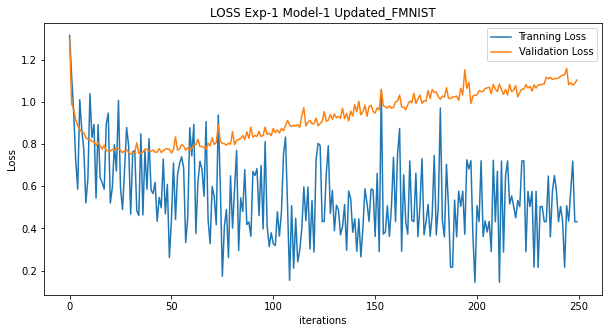

In [ ]:
plt.figure(figsize=(10,5))
plt.title("LOSS Exp-1 Model-1 Updated_FMNIST")
plt.plot(_tranning_loss,label="Tranning Loss")
plt.plot(_validation_loss,label="Validation Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

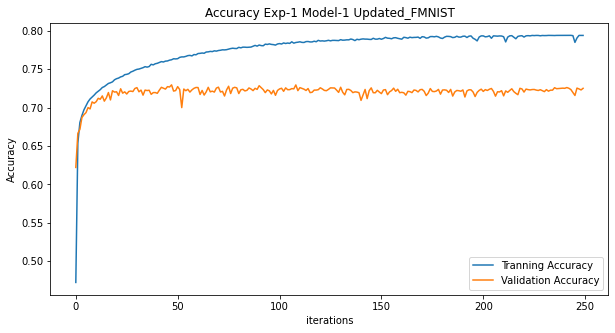

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Accuracy Exp-1 Model-1 Updated_FMNIST")
plt.plot(_tranning_acc,label="Tranning Accuracy")
plt.plot(_validation_acc,label="Validation Accuracy")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()